In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare

```python3 -m pip install tushare```

In [5]:
stock_code = '600519'

In [58]:
stock_df = tushare.get_k_data(code=stock_code, start='2010-01-01', end='2018-06-29', ktype='60') # ktype = every 60 mins

In [60]:
stock_df.tail()

,date,open,close,high,low,volume,code
477,2018-06-28 15:00,707.22,710.93,711.01,706.28,8751.0,600519
478,2018-06-29 10:30,712.30,718.50,718.88,705.01,10582.0,600519
479,2018-06-29 11:30,718.65,723.92,724.10,717.00,7580.0,600519
480,2018-06-29 14:00,723.92,730.90,730.97,723.80,6561.0,600519
481,2018-06-29 15:00,730.90,731.46,732.30,730.00,8206.0,600519


In [61]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 7 columns):
date      482 non-null object
open      482 non-null float64
close     482 non-null float64
high      482 non-null float64
low       482 non-null float64
volume    482 non-null float64
code      482 non-null object
dtypes: float64(5), object(2)
memory usage: 26.4+ KB


In [62]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [63]:
stock_df.set_index('date', inplace=True)

In [65]:
stock_df.head()

,open,close,high,low,volume,code
date,,,,,,
2017-12-28 14:00:00,699.59,716.30,719.90,699.59,31706.0,600519
2017-12-28 15:00:00,716.30,718.69,718.99,709.10,19636.0,600519
2017-12-29 10:30:00,718.00,710.60,726.00,708.00,29508.0,600519
2017-12-29 11:30:00,710.60,708.50,711.72,705.10,10283.0,600519
2017-12-29 14:00:00,708.50,699.93,708.99,696.55,16123.0,600519


In [66]:
resampled_df = stock_df.resample('D').last()

In [69]:
resampled_df.head(10)

,open,close,high,low,volume,code
date,,,,,,
2017-12-28,716.30,718.69,718.99,709.10,19636.0,600519
2017-12-29,699.01,697.49,700.00,691.65,20124.0,600519
2017-12-30,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,703.68,703.85,706.79,703.00,9316.0,600519
2018-01-03,716.50,715.86,719.48,714.15,11235.0,600519
2018-01-04,738.00,737.07,739.60,735.10,11493.0,600519
2018-01-05,734.52,738.36,739.78,734.00,7181.0,600519


In [71]:
resampled_df.dropna(inplace=True)

In [72]:
resampled_df.head()

,open,close,high,low,volume,code
date,,,,,,
2017-12-28,716.30,718.69,718.99,709.10,19636.0,600519
2017-12-29,699.01,697.49,700.00,691.65,20124.0,600519
2018-01-02,703.68,703.85,706.79,703.00,9316.0,600519
2018-01-03,716.50,715.86,719.48,714.15,11235.0,600519
2018-01-04,738.00,737.07,739.60,735.10,11493.0,600519


In [73]:
resampled_df['MA5'] = resampled_df['close'].rolling(window=5).mean()
resampled_df['MA30'] = resampled_df['close'].rolling(window=30).mean()
resampled_df['MA60'] = resampled_df['close'].rolling(window=60).mean()

In [74]:
resampled_df.head()

,open,close,high,low,volume,code,MA5,MA30,MA60
date,,,,,,,,,
2017-12-28,716.30,718.69,718.99,709.10,19636.0,600519,NaN,NaN,NaN
2017-12-29,699.01,697.49,700.00,691.65,20124.0,600519,NaN,NaN,NaN
2018-01-02,703.68,703.85,706.79,703.00,9316.0,600519,NaN,NaN,NaN
2018-01-03,716.50,715.86,719.48,714.15,11235.0,600519,NaN,NaN,NaN
2018-01-04,738.00,737.07,739.60,735.10,11493.0,600519,714.592,NaN,NaN


**note1**

- ```data_df[  [ 'col1','col2','col3','...' ]  ].plot(figsize=(9,6))```, multi-columns show in one plot 
- ```data_df.groupby('col1')[  [ 'col2','col3','...' ]  ].mean() / .sum()```, multi-columns get mean as the same time->global videogames sales

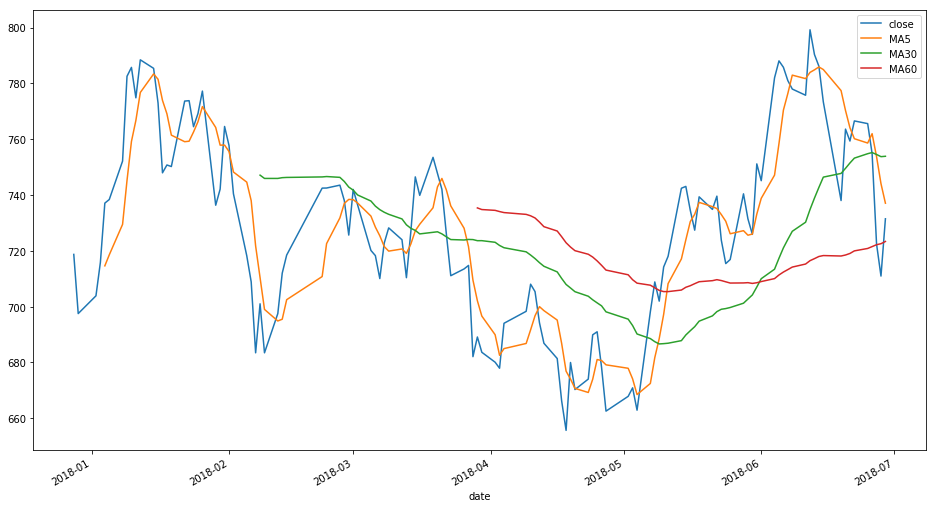

In [79]:
resampled_df[ ['close','MA5','MA30','MA60'] ].plot(figsize=(16,9))

```python

"""
    明确任务：
        计算指定股票的各项均线指标
"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import tushare

stock_code = '600519'

# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)


def collect_data():
    """
        数据获取
    """
    stock_df = tushare.get_k_data(code=stock_code, start='2010-01-01', end='2018-01-01', ktype='60')
    return stock_df


def process_data(stock_df):
    """
        数据处理
    """
    stock_df['date'] = pd.to_datetime(stock_df['date'])
    stock_df.set_index('date', inplace=True)
    resampled_stock_df = stock_df.resample('D').last()
    resampled_stock_df.dropna(inplace=True)
    return resampled_stock_df


def analyze_data(stock_df):
    """
        数据分析
    """
    stock_df['MA 5'] = stock_df['close'].rolling(window=5).mean()
    stock_df['MA 30'] = stock_df['close'].rolling(window=30).mean()
    stock_df['MA 60'] = stock_df['close'].rolling(window=60).mean()

    return stock_df


def save_plot_results(stock_ext_df):
    """
        结果展示
    """
    stock_ext_df.to_csv(os.path.join(output_path, 'stock_ext.csv'))

    stock_ext_df[['close', 'MA 5', 'MA 30', 'MA 60']].plot()
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'stock_ext.png'))
    plt.show()


def main():
    """
        主函数
    """
    # 数据获取
    stock_df = collect_data()

    # 数据处理
    pro_stock_df = process_data(stock_df)

    # 数据分析
    stock_ext_df = analyze_data(pro_stock_df)


    save_plot_results(stock_ext_df)


if __name__ == '__main__':
    main()
```